# TD 2 | Analyse et visualisation de données avec numpy, pandas et matplotlib


Objectifs du TD :

* découvrir la visualisation de données avec matplotlib
* approfondir la maîtrise de numpy et pandas
* effectuer une première analyse exploratoire de données (EDA)
* découvrir la librairie de machine learning (ML) scikit-learn
* appliquer des techniques basiques d'apprentissage non supervisé pour visualiser et classifier des données (PCA, $k$-means)

---

## 1. Exploratory Data Analysis (EDA) avec matplotlib

<img src="./rc/matplotlib.png" />

La librairie la plus couramment utilisée pour visualiser des données en Python est matplotlib (https://matplotlib.org/). D'autres librairies très utilisées et permettant certaines fonctionnalités plus avancées sont plotly (https://plot.ly/python/), bokeh (https://bokeh.pydata.org/en/latest/) ou encore seaborn (https://seaborn.pydata.org/). Nous allons dans un premier temps découvrir la première, matplotlib.

Le contexte permettant de tracer des graphes est `matplotlib.pyplot`, que l'on abrège souvent par `plt`, comme ci-dessous :

In [2]:
import matplotlib.pyplot as plt

**La documentation de pyplot : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot**

Découvrons les différents types de graphes en pratique, à l'aide du fichier `Vol010.csv`.

### Chargement des données de vol

In [3]:
# !git clone https://github.com/MadaneA/MACS3-Statistiques-Descriptives-TDs.git

In [4]:
import os

os.getcwd()

'/home/wsl/github_repository/mon_projet/td2'

In [5]:
# os.chdir('MACS3-Statistiques-Descriptives-TDs')

In [6]:
import numpy as np
import pandas as pd

In [7]:
# Ne pas modifier
vol = pd.read_csv("../data/Vol010.csv").drop(0).dropna(how='any').iloc[::10] # On ne garde qu'un point sur 10 pour limiter les points à affichervol
vol.index = np.arange(vol.shape[0])
vol['t'] = pd.to_datetime(vol['t'])
vol[vol.columns[1:]] = vol[vol.columns[1:]].apply(pd.to_numeric)
vol['FLIGHT_MOD'] = vol['FLIGHT_MOD'].apply(int)

In [8]:
vol.dtypes

t             datetime64[ns]
EGT_SEL              float64
FLIGHT_MOD             int64
FMV_SEL              float64
HPTC_SEL             float64
LPTC_SEL             float64
N1_SEL               float64
N2_ACTSEL            float64
OIL_P                float64
OIL_TEMP             float64
PS3_SEL              float64
PT2_SEL              float64
P0_SEL               float64
TAT                  float64
TBV_SEL              float64
TRA_SEL              float64
T25_SEL              float64
T3_SEL               float64
VBV_SEL              float64
VIB_CN1              float64
VIB_CN2              float64
VIB_TN1              float64
VIB_TN2              float64
VSV_SEL              float64
WFM_SEL              float64
XM                   float64
dtype: object

In [9]:
print(vol.shape)
vol.head()

(2283, 26)


,t,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
0,2011-09-15 14:26:02.875,335.984000,1,0.0,0.0,0.0,0.0,0.0,0.000,177.3740,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7679.84,0.15
1,2011-09-15 14:26:05.375,72.000600,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
2,2011-09-15 14:26:07.875,72.001100,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15
3,2011-09-15 14:26:10.375,527.978000,1,0.0,0.0,0.0,0.0,0.0,0.000,68.0000,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10752.10,0.15
4,2011-09-15 14:26:12.875,-0.001335,1,0.0,0.0,0.0,0.0,0.0,456.002,44.6249,...,-128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15


### Line/Scatter plot : Visualisation d'un vol avec `plt.plot`

La méthode `plt.plot(x=..., y=..., options)` permet de visualiser des points sur un graphique. La commande ci-dessous affiche la valeur d'une variable au cours du temps. 

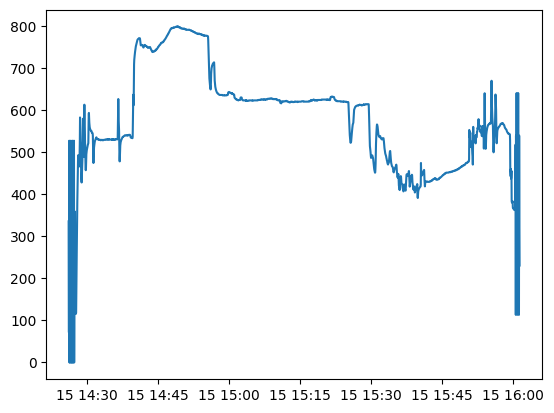

In [10]:
plt.plot(vol['t'], vol['EGT_SEL'])

Il est possible de superposer deux graphes en appelant plusieurs points plt.plot(). De plus, plot() peut recevoir une grande quantité d'options pour personnaliser l'aspect de la courbe :

- ligne ou points
- type de marqueur
- couleurs, taille/épaisseur de trait
- ...

Certaines options peuvent être combinées et exprimées sous forme de chaîne de caractère. Par exemple, 'b^--' signifie "marqueurs bleus en forme de triangles, reliés par un trait pointillé".

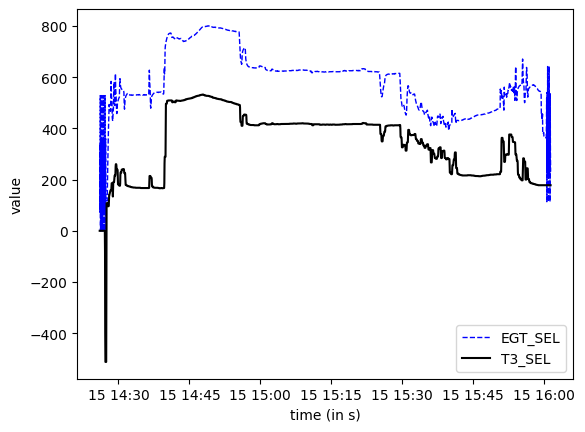

In [11]:
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')
plt.xlabel('time (in s)')
plt.ylabel('value')
plt.legend(['EGT_SEL', 'T3_SEL'])

Il est possible de visualiser plusieurs graphiques de manière juxtaposée. La méthode utilisée est plt.subplot().
Ses paramètres sont : le nombre de lignes, le nombre de colonnes, et le sous-plot sur lequel vous vous trouvez. 

Ainsi, dans plt.subplot(1, 2, 1); 1, 2, 1 signifie "une figure à 1 ligne et 2 colonnes : allez au premier sous-plot". Ensuite, 1, 2, 2 signifie "une figure à 1 ligne et 2 colonnes : passez au deuxième sous-plot"

plt.figure(figsize=(x,y)) permet de définir la taille des plots, avec x : longueur et y: largeur.

plt.xlim(inf,sup) et plt.ylim(inf,sup) permettent de fixer la borne inférieur et supérieur respectivement de l'axe x et l'axe y.

Text(0.5, 1.0, 'Figure 2')

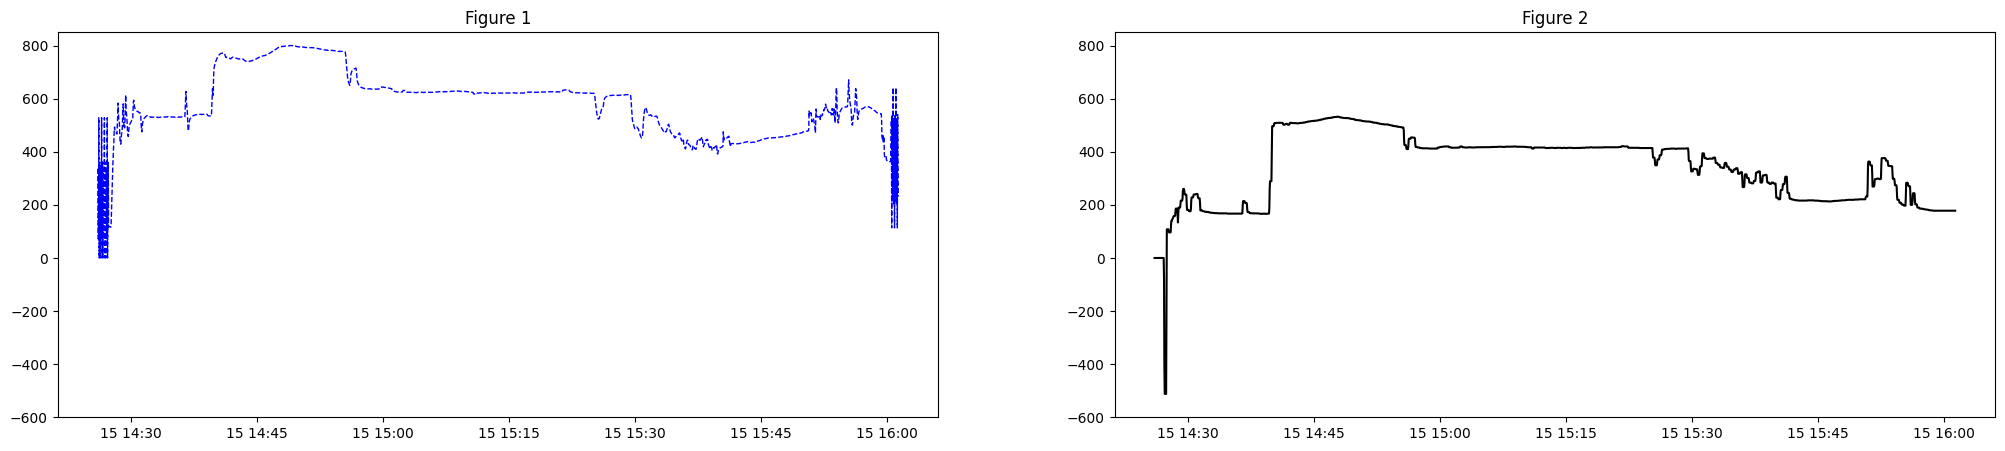

In [12]:
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 2, 1)
plt.plot(vol['t'], vol['EGT_SEL'], 'b--', linewidth=1)
plt.ylim(-600,850)
plt.title('Figure 1')

plt.subplot(1, 2, 2)
plt.plot(vol['t'], vol['T3_SEL'], 'k-')
plt.ylim(-600,850)
plt.title('Figure 2')
         

### Corrélation

Utiliser la méthode corrcoef du module numpy pour calculer la corrélation entre deux variables X et Y.

In [13]:
my_rho = np.corrcoef(vol['T3_SEL'], vol['N1_SEL'])

print(my_rho)

[[1.         0.93912182]
 [0.93912182 1.        ]]


Nuage de point entre les deux variables T3 et N1 :

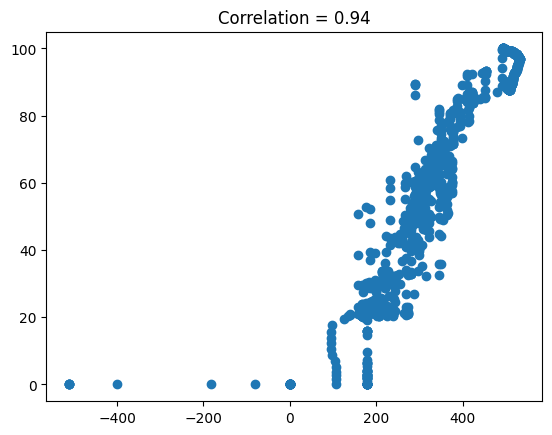

In [14]:
plt.scatter(vol['T3_SEL'],vol['N1_SEL'])
plt.title('Correlation = ' + "{:.2f}".format(my_rho[0,1]))
plt.show()

/tmp/ipykernel_3399/3024962577.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = vol.corr()


<AxesSubplot: >

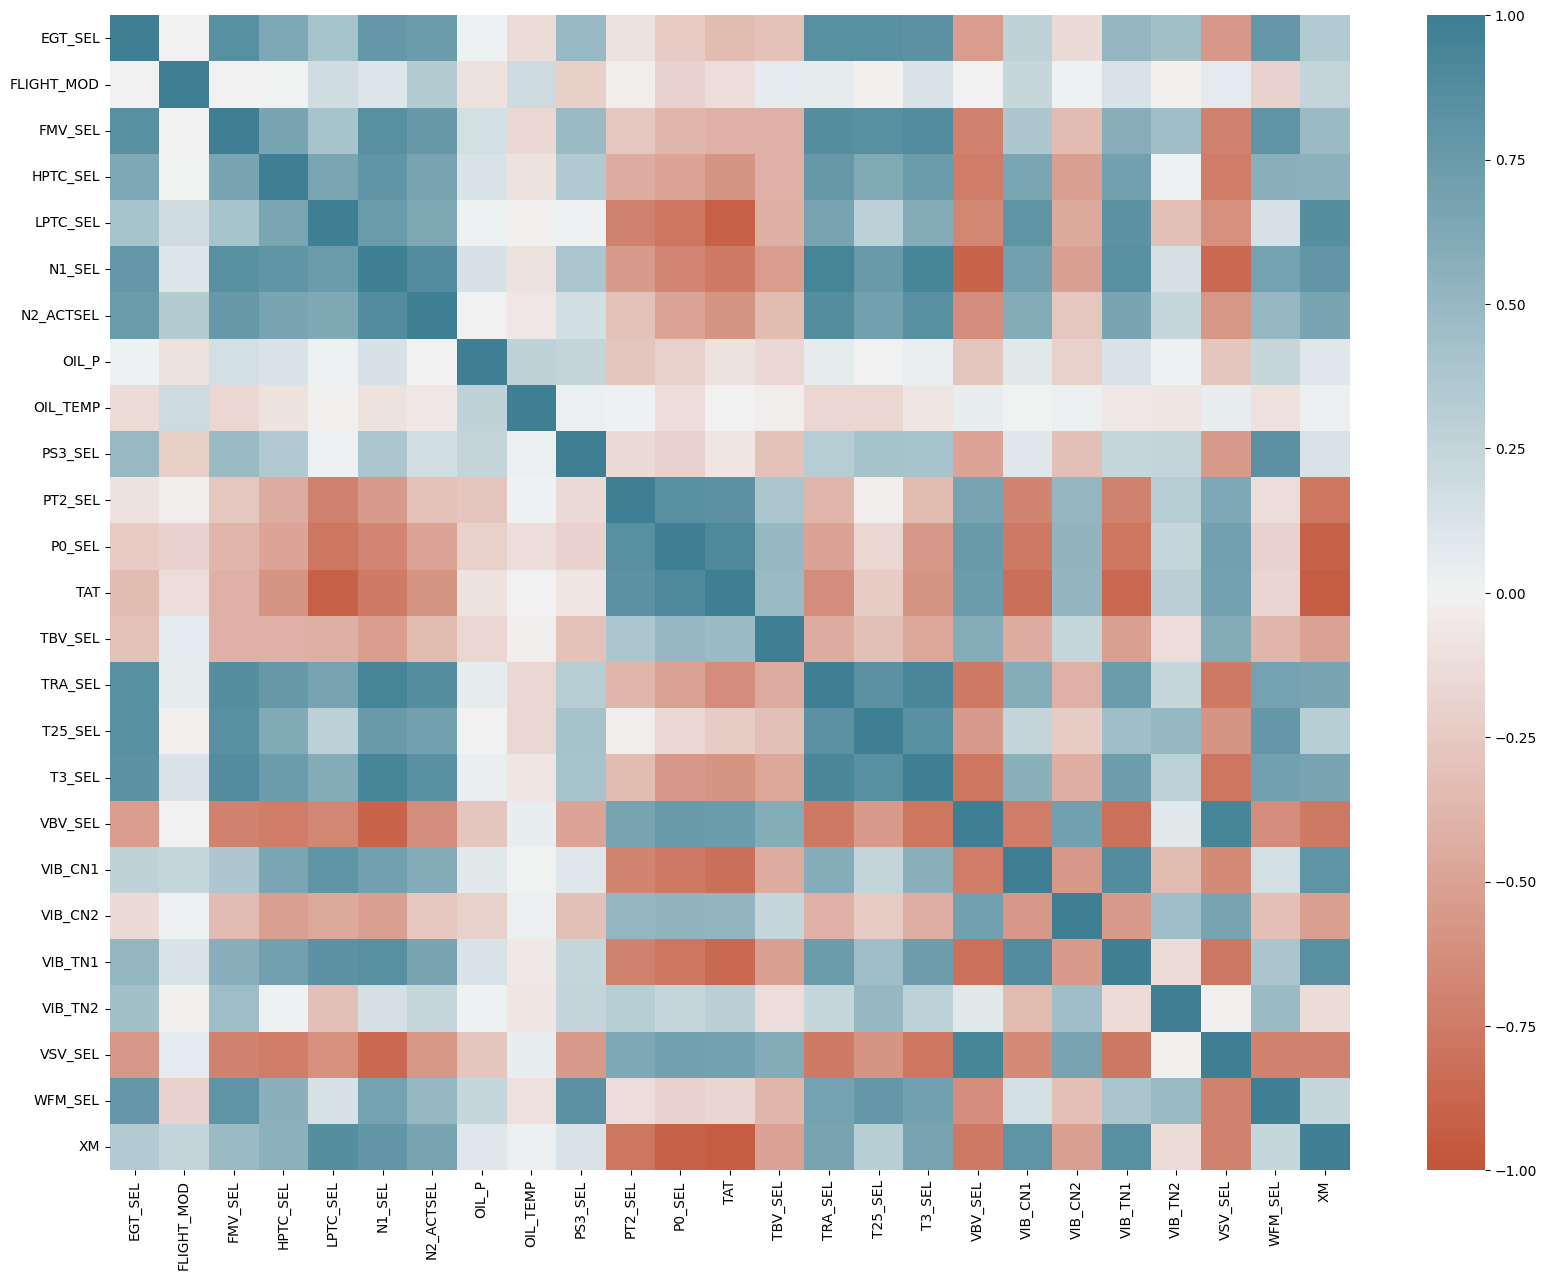

In [15]:
import seaborn as sns

# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=False, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))

# Essayer avec annot=True

/tmp/ipykernel_3399/313260899.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = vol.corr()


<AxesSubplot: >

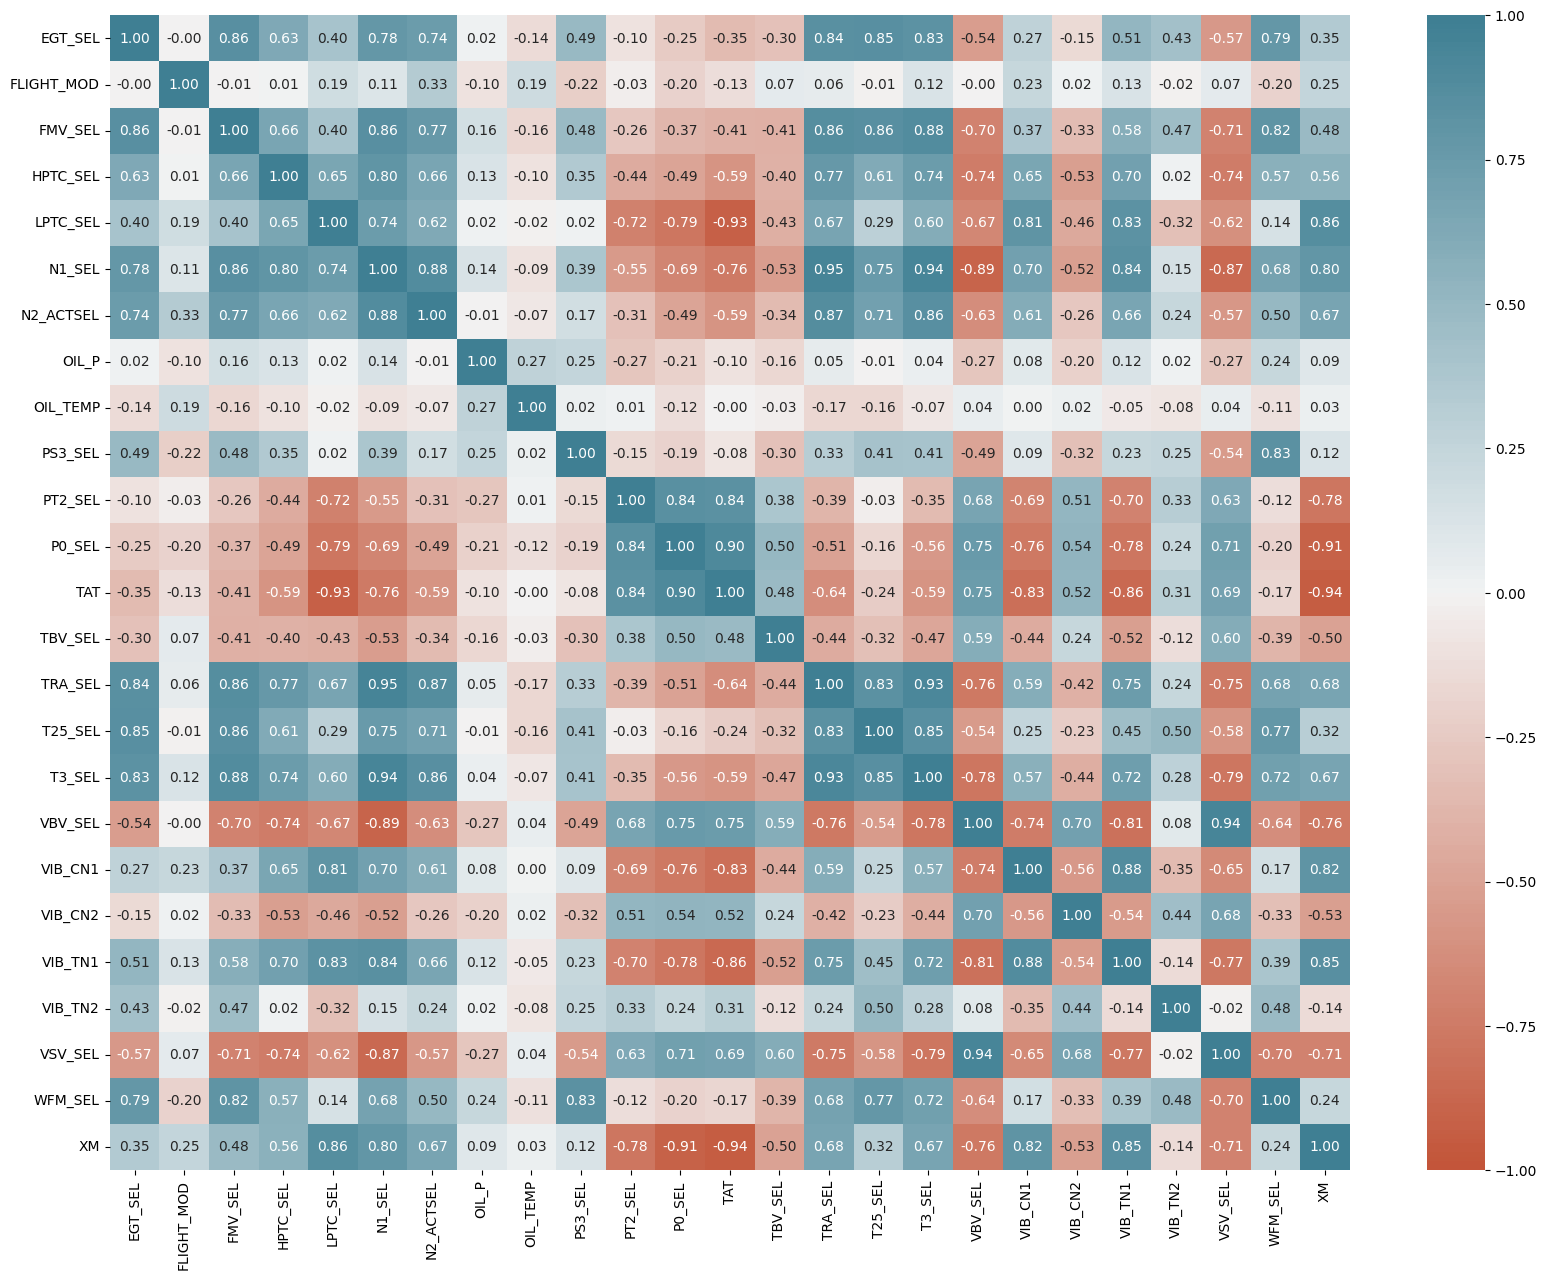

In [16]:
import seaborn as sns

# calculate the correlation matrix
corr = vol.corr()

# plot the heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, 
        cmap=sns.diverging_palette(20, 220, n=200))

# Essayer avec annot=True

In [17]:
"""
EXERCICE - Plot avec titres et légende

Explorez la documentation de pyplot pour ajouter au graphe précédent :
1. Un titre à la figure
2. Des titres aux axes
3. Une légende
"""

'\nEXERCICE - Plot avec titres et légende\n\nExplorez la documentation de pyplot pour ajouter au graphe précédent :\n1. Un titre à la figure\n2. Des titres aux axes\n3. Une légende\n'

### Bar plot : temps passé dans chaque phase de vol avec `plt.bar`

Pour afficher un ensemble réduit de valeurs, le diagramme le plus adapté est le bar plot. Tout d'abord, il nous faut calculer le nombre de lignes du vol par phase de vol. La phase de vol est symbolisée par la variable `FLIGHT_MOD`. On suppose la correspondance suivante :

`FLIGHT_MOD` | Phase de vol
-------------|-------------
1 | taxi
2 | take_off
3 | begin_climb
4 | climb
5 | cruise_climb
6 | cruise
7 | descent
8 | approach
9 | flare
10 | landing

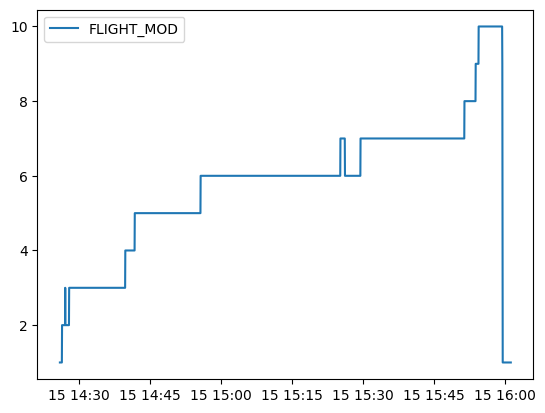

In [18]:
plt.plot(vol['t'], vol['FLIGHT_MOD'], label='FLIGHT_MOD')
plt.legend()

In [19]:
"""
EXERCICE - Correpondance FLIGHT_MOD/phase de vol
1. Créez un liste définissant la correspondance FLIGHT_MOD/phase de vol
2. Ajoutez une nouvelle colonne 'FLIGHT_PHASE' au DataFrame contenant le nom de la phase. Une possibilité est d'utiliser la méthode "apply" et une fonction anonyme (lambda).
"""
flight_phase = {
    1   : 'taxi',
    2   : 'take_off',
    3   : 'begin_climb',
    4   : 'climb',
    5   : 'cruise_climb',
    6   : 'cruise',
    7   : 'descent',
    8   : 'approach',
    9   : 'flare',
    10  : 'landing'
    }
vol['FLIGHT_PHASE'] = [flight_phase[x] for x in vol['FLIGHT_MOD']]
vol['FLIGHT_PHASE'].sample(10)


593     cruise_climb
2246            taxi
1450          cruise
2023         descent
2282            taxi
0               taxi
207      begin_climb
1148          cruise
2264            taxi
1610         descent
Name: FLIGHT_PHASE, dtype: object

In [20]:
"""
EXERCICE - Calcul du nombre de lignes par phase de vol
Groupez le DataFrame par phase de vol avec groupby() et aggrégez le résultat avec size().
"""
time_by_phase = vol.groupby(['FLIGHT_PHASE']).size()

Voici enfin notre fameux bar plot :

<BarContainer object of 10 artists>

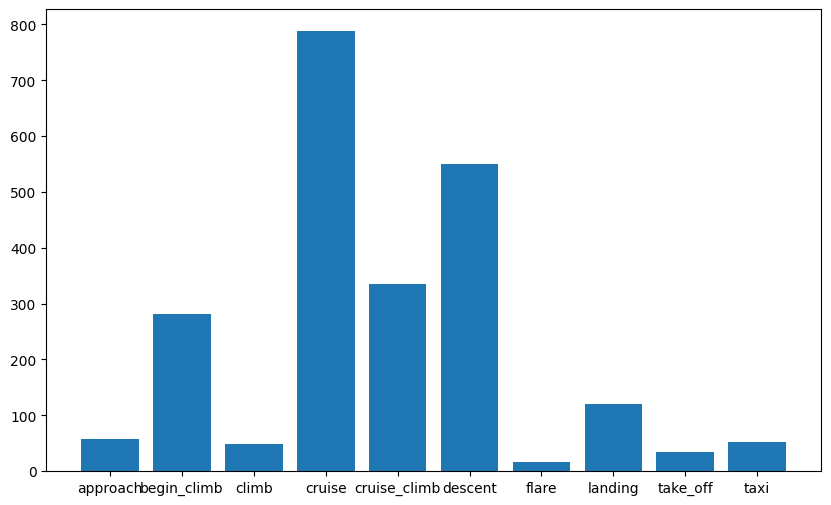

In [21]:
plt.figure(figsize=(10,6)) # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(time_by_phase.size), time_by_phase, tick_label=time_by_phase.index.tolist())

In [22]:
"""
EXERCICE - Affichez la température T25 maximale par phase de vol sur un bar plot de couleur rouge.
"""
vol.groupby('FLIGHT_PHASE').max('T25_SEL')

,EGT_SEL,FLIGHT_MOD,FMV_SEL,HPTC_SEL,LPTC_SEL,N1_SEL,N2_ACTSEL,OIL_P,OIL_TEMP,PS3_SEL,...,T25_SEL,T3_SEL,VBV_SEL,VIB_CN1,VIB_CN2,VIB_TN1,VIB_TN2,VSV_SEL,WFM_SEL,XM
FLIGHT_PHASE,,,,,,,,,,,,,,,,,,,,,
approach,579.281,8,32.750,99.4160,26.7551,66.4843,91.4063,43.0000,113.000,166.0000,...,73.5000,376.0,3.427730e+01,0.39125,0.07000,0.21000,0.11000,26.63090,3290.0,0.259
begin_climb,679.625,3,19.625,94.4630,28.4893,86.1759,97.1250,47.4375,108.000,1344.0200,...,75.5000,289.0,3.427730e+01,0.60000,0.32000,0.13000,0.32000,31.99220,10752.1,0.150
climb,772.094,4,70.375,99.5000,25.8750,90.2500,99.3750,52.0000,108.000,312.0000,...,109.5000,509.0,1.888140e-12,0.12875,0.11000,0.24125,0.34000,2.24121,7718.0,0.274
cruise,714.594,6,42.000,99.4951,64.0625,93.3320,95.3750,43.0000,105.000,144.0000,...,70.5000,454.0,4.834030e-01,0.34000,0.08000,0.52000,0.23000,5.00977,3478.0,0.791
cruise_climb,800.000,5,64.625,99.5542,61.1387,100.0000,99.2188,51.0000,96.000,274.0000,...,111.0000,532.0,3.392580e+01,0.20000,0.11125,0.40125,0.46000,38.32030,6656.0,0.749
descent,579.875,7,33.875,99.4902,63.3750,82.7852,91.7188,43.0000,116.000,144.0000,...,58.0000,399.5,3.427730e+01,0.41125,0.28375,0.69375,0.41875,26.87260,2794.0,0.783
flare,641.031,9,32.750,94.0859,26.6182,72.8709,94.0625,43.0312,108.000,206.0000,...,56.7500,298.0,3.423340e+01,0.09375,0.16375,0.15125,0.20000,38.05660,4794.0,0.180
landing,670.749,10,19.375,45.3926,27.5510,43.7070,84.5000,37.0000,113.000,81.4999,...,46.7500,283.0,3.399170e+01,0.08000,0.29250,0.12000,0.23000,37.02390,1804.0,0.150
take_off,527.981,2,10.750,37.2070,27.3848,17.7070,60.1563,743.9960,658.626,1343.9700,...,37.2500,108.0,3.427730e+01,0.00000,0.24250,0.00000,0.12875,38.40820,10752.0,0.150


### Pie plot : temps passé dans chaque phase de vol avec `plt.pie`

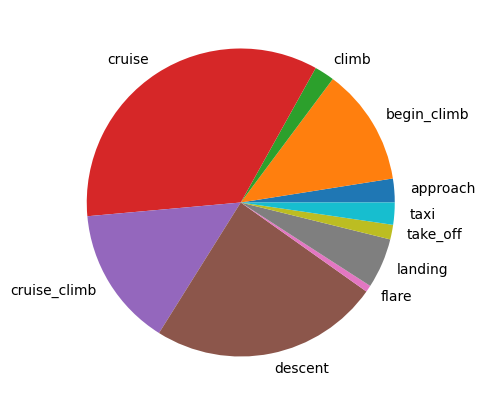

In [23]:
plt.figure(figsize=(5,5))
plt.pie(time_by_phase, labels=time_by_phase.index.tolist());

### Histogramme : représenter la distribution d'une variable

La meilleur façon de visualiser la distribution statistique d'une variable est l'histogramme. La méthode s'appelle `plt.hist()`. Étudiez sa documentation, car elle a de nombreux paramètres.

Voici un exemple avec la variable N1.

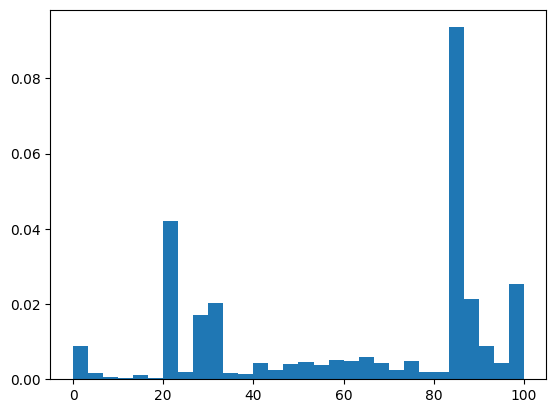

In [24]:
plt.hist(vol['N1_SEL'], bins=30, density=True); # Quel est l'effet de l'argument "density=..." ?
# L'option "density" permet de normaliser le résultat pour obtenir une distribution de probabilité plutôt qu'un nombre de tirages. 

Beaucoup d'autres types de plots existents ! À vous de les découvrir...

## 2. Machine Learning non supervisé pour l'exploration de données avec scikit-learn

<img src="rc/scikit2.png" />

Dans cette section, on continue d'explorer le jeu de données à l'aide de techniques classique :

* PCA (Principal Component Analysis, https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales) : permet de trouver les composantes principales d'un jeu de données, correspondant aux directions orthogonales de plus grande variabilité des données. Ce directions correspondent aux vecteurs propres de la matrice de corrélation. En pratique, cette technique statistique permet de réduire la dimensionalité des données en les projectant sur les directions principales. En réduisant la dimensionalité à 2, on peut donc visualiser les données sur un plan.

<img width="300px" src="rc/PCA_fish.png" />

* $k$-means (https://fr.wikipedia.org/wiki/K-moyennes) est l'algorithme le plus répandu de _clustering_. Le clustering consiste à partitionner les données en différents groupes (appelés _clusters_), en maximisant la similarité _intra-cluster_ (entre les points d'un même cluster) et minimisant la similarité _inter-cluster_ (entre les points de clusters différents). Le clustering est aussi appelée classification _non supervisée_ (car on ne dispose pas d'étiquettes pour chaque classe).

<img width="300px" src="rc/cluster.png" />

Ces deux algorithmes incontournables permettent de décrire nos données et répondre aux questions suivantes :

* Quel est la distribution des données dans le plan des 2 première CP (composantes principales) ?
* Y a-t-il des groupes distincts dans nos données ?


#### 2.1. Préparation des données

Ces algorithmes requièrent des données numériques. Il faut donc éliminer du jeu de données les variables non numérique ou les transformer en variables numériques.

De plus, on essayera dans la suite de classifier les instants du vol par phase de vol en utilisant un algorithme de clustering. On élimine donc également la colonne "FLIGHT_MOD" du jeu de données.

In [28]:
"""
EXERCICE - Préparation des données
1. Quelles sont les variables non numériques dans les données de vol ?
2. Supprimez ces colonnes, ainsi que le FLIGHT_MOD, et créez une variable X_vol contenant les valeurs numériques sous forme d'array numpy (on y accède via la propriété `values`).
3. Affichez les dimensions de X_vol (nombre d'individus et de variables).
"""
vol.columns

Index(['t', 'EGT_SEL', 'FLIGHT_MOD', 'FMV_SEL', 'HPTC_SEL', 'LPTC_SEL',
       'N1_SEL', 'N2_ACTSEL', 'OIL_P', 'OIL_TEMP', 'PS3_SEL', 'PT2_SEL',
       'P0_SEL', 'TAT', 'TBV_SEL', 'TRA_SEL', 'T25_SEL', 'T3_SEL', 'VBV_SEL',
       'VIB_CN1', 'VIB_CN2', 'VIB_TN1', 'VIB_TN2', 'VSV_SEL', 'WFM_SEL', 'XM',
       'FLIGHT_PHASE'],
      dtype='object')

Ensuite, il est nécessaire en analyse de données de normaliser nos données, car les différentes variables peuvent avoir des unités et plages de valeurs très différentes les unes des autres. Par exemple, certaines variables varient entre 0 et 1, d'autre, comme les températures, peuvent varier (en gros) de 0 à 1000. Pour pouvoir les rendre comparables, on utilisera la normalisation standard suivante, appelée _standardisation_ :

1. Retrait de la moyenne de chaque variable.
2. Division par l'écart-type.

Cela permet d'obtenir des variables de moyenne nulle et d'écart-type 1. Il existe bien entendu des normalisations bien plus poussées.

In [30]:
"""
EXERCICE - Standardisation
1. Normalisez le jeu de donnée X_vol comme expliqué précédemment, et stockez le résultat dans une variable X_vol_norm.
   Pour cela, utilisez les méthodes mean() et std() de numpy, en prenant garde à calculer selon les bonnes dimensions.
2. Véfifiez à la fin que X_vol_norm a bien une moyenne nulle et un écart-type égal à 1 pour toutes les variables.
3. Que renvoie `(X_vol_norm.mean(axis=0) == 0).all()` ? Pourquoi à votre avis ? Pour pailler à ce problème, documentez-vous et utilisez la méthode `np.isclose` de numpy 
   pour effectuer cette vérification.
"""


'\nEXERCICE - Standardisation\n1. Normalisez le jeu de donnée X_vol comme expliqué précédemment, et stockez le résultat dans une variable X_vol_norm.\n   Pour cela, utilisez les méthodes mean() et std() de numpy, en prenant garde à calculer selon les bonnes dimensions.\n2. Véfifiez à la fin que X_vol_norm a bien une moyenne nulle et un écart-type égal à 1 pour toutes les variables.\n3. Que renvoie `(X_vol_norm.mean(axis=0) == 0).all()` ? Pourquoi à votre avis ? Pour pailler à ce problème, documentez-vous et utilisez la méthode `np.isclose` de numpy \n   pour effectuer cette vérification.\n'

On ne ré-invente pas la roue : scikit-learn propose déjà un ensemble de méthodes de normalisation dans son module de prétraitement, `sklearn.preprocessing`.

In [3]:
from sklearn.preprocessing import StandardScaler

X_vol_norm = StandardScaler().fit_transform(X_vol)

NameError: name 'X_vol' is not defined

In [ ]:
"""
EXERCICE - La résultat est-il bien identique ?
"""


#### 2.2. PCA

In [2]:
from sklearn.decomposition import PCA

In [ ]:
vol_pca = PCA(n_components=2).fit(X_vol_norm)

#### 2.2.1. Étude de la variance expliquée

Le modèle PCA permet d'obtenir la part de variance des données expliquée par les différentes CP. En général, on garde autant de CP que nécessaire pour expliquer au total par exemple 90% ou 95% de la variance des données, afin de limiter la perte d'information. Ici, on en conserve 2 pour des raisons de visualisation.

In [ ]:
"""
EXERCICE - Étude de la variance expliquée
1. Affichez les parts de variance expliquées par les 2 premières CP à l'aide de la propriété `explained_variance_ratio_` du modèle PCA. Faites varier le nombres de CP (3, 4... 25).
   Affichez les résultats en %.
2. Quel est le pourcentage de variance expliquée par les 2 premières CP ? Est-il cohérent de ne conserver que ces 2 dimensions ?
   Combien de composantes faudrait-il garder pour expliquer 90% de la variance ? 95% ?
3. Tracez un bar plot de la variance expliquée par chaque CP, en n'oubliant pas le titre, les noms des axes et les étiquettes sur l'axe des abscisses ('PC1', 'PC2', etc.).
   Essayez avec une échelle logarithmique.
"""


#### 2.2.2. Projection et visualisation

À présent, on projette les données sur les 2 premières CP pour les visualiser sur un scatter plot. La projection s'effectue :

* par produit matriciel avec les composantes principales, contenues dans l'array `vol_pca.components_`
* via la méthode `transform(...)` du modèle PCA

In [ ]:
"""
EXERCICE - Projection et visualisation par PCA.
1. Projettez les données sur les 2 premières CP.
2. Affichez le résultat sur un scatter plot. Que représente chaque point ? Que représentent les axes ? 
3. Étant donné que notre jeu de données est une série temporelle, il serait intéressant de visualiser la trajectoire du vol dans le plan de la PCA.
   Proposez et mettez en œuvre une solution permettant de visualiser cet aspect temporel sur le scatter plot.
   
"""


Ressource utile : les color maps matplotlib https://matplotlib.org/users/colormaps.html

In [ ]:
"""
EXERCICE - Projection et visualisation par PCA avec affichage de la phase de vol.
Complétez le code matplotlib suivant afin de de colorer les points par phase de vol, avec une légende.
"""
plt.figure(figsize=(10,10))
for phase in phases:
    data = ...
    plt.scatter(data[:, 0], data[:, 1], label=phase)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA du vol avec phases de vol')

#### 2.3. $k$-means

L'algorithme $k$-means est disponible dans le module `sklearn.clustering`, au côté d'autres algorithmes de clustering. 

In [ ]:
from sklearn.cluster import KMeans

#### 2.3.1. Apprentissage et visualisation des résultats

In [ ]:
"""
EXERCICE - k-means clustering
1. Instanciez un modèle k-means avec 10 centroïdes.
2. Apprenez le modèle sur le jeu de données `X_vol_norm` et récupérez les étiquettes des clusters via la méthode de prédiction.
3. Créez une figure composée de 2 graphiques.
   3.1. Sur le graphique 1, affichez le nombre d'éléments par cluster sur un bar plot (indice : la méthode `bincount` de nummy évitera d'écrire une boucle).
   3.2. SUr le graphique 2, affichez un scatter plot de la projection PCA en colorant les points par cluster.
4. Interprétez le résultat. Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?
"""


#### 2.3.2. Calcul de la pureté du clustering

On souhaite maintenant répondre plus en détail à la question :
    
> Peut-on établir une correspondance entre les clusters trouvés par k-means et les phases de vol ?

On commence par évaluer la capacité de notre modèle à trouver des clusters **homogènes par rapport à une variable cible**. Ici, notre variable cible sera la phase de vol. On cherche donc à mesurer si les clusters contiennent des points appartenant à une même phase de vol. Pour cela, on utilise un **indice de qualité de clustering** appelé **pureté** (_purity_). 

La pureté se calcule de la manière suivante :

1. On associe à tous les points d'un cluster la classe (i.e. la variable cible) la plus fréquente au sein de ce cluster.
2. On divise le nombre de points correctement associés à leur cluster par le nombre total de points.

Pour un partitionnement $\mathbf{Q} = \{Q_k\}, k = 1 \ldots K$ et en notant $\mathbf{Y} = \{Y_j\}, j = 1 \ldots C$ l'ensemble des points appartenant à chaque classe, on a :
\begin{equation}
    purity(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \sum_{k=1}^K \underset{j = 1 \ldots C}{\max} |Q_k \cap Y_j|
\end{equation}

In [ ]:
"""
EXERCICE - Calcul de la pureté
1. Implémentez une fonction calculant la pureté d'un clustering à partir des labels et des valeurs de la variable cible. 
2. Quelle la pureté du modèle avec 10 clusters ?
"""
def cluster_purity(labels, targets):
    raise NotImplementedError

pur = cluster_purity(...)
print('Pureté : {:f} %'.format(pur*100))

In [ ]:
"""
EXERCICE - Effet du nombre de clusters sur la pureté
1. Faites varier le nombre de clusters de k-means. Quel est l'effet sur la pureté ?
2. Tracez la pureté en fonction du nombre de clusters pour quelques valeurs de ce nombre (par exemple K=1, 2, 3, 5, 10, 20, 30, 50).
3. Quelle est, à votre avis, la "meilleure" valeur de K ? Que peut-on en conclure ?
"""


#### 2.3.3. Calcul de la précision de classification non supervisée (_unsupervised clustering accuracy_)

Enfin, on souhaite évaluer la performance de notre modèle en tant que classificateur.

**Note** : cette approche n'a de sens que si le nombre de clusters est égal au nombre de classes de la variable cible !

Pour ce faire, nous allons passer par une métrique appelée **unsupervised clustering accuracy**. Celle-ci correspond à la précision de classification (i.e. proportion de points correctement classifiés), mais dans un cadre non supervisé. Cette métrique mesure la capacité à partitionner les données selon les différentes modalités d'une variable cible. La question est donc de mesurer la capacité du modèle $k$-means à partitionner les données selon la phase de vol.

Cette métrique s'écrit :
\begin{equation}
    acc(\mathbf{Q}, \mathbf{Y}) = \frac{1}{N} \underset{m}\max \sum_{k=1}^K |Q_k \cap Y_{m(k)}|
\end{equation}

où on cherche la meilleure association $m$ (_mapping_) deux à deux entre clusters et classes (dans notre cas, l'association entre Cluster 0, Cluster 1, etc. et les phases de vol taxi, take_off, etc.).

Pour calculer cette meilleur association, un algorithme efficace est la _méthode Hongroise_ ou algorithme de Kuhn-Munkres. Celui-ci est disponible dans le module de scipy `scipy.optimize.linear_sum_assignment`.

In [ ]:
from scipy.optimize import linear_sum_assignment

In [ ]:
def cluster_acc(labels, targets):
    assert labels.size == targets.size
    D = max(labels.max(), targets.max()) + 1
    w = np.zeros((D, D))
    for i in range(labels.size):
        w[labels[i], targets[i]] += 1
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    return w[row_ind, col_ind].sum() * 1.0 / labels.size

acc = cluster_acc(labels, vol['FLIGHT_MOD'])
print('Accuracy : {:f} %'.format(acc*100))

#### Test Khi-2

Découvrir la library scipy pour effectuer le test de chi-deux d'indépendance des variables dans un tableau de contingence.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

scipy.stats.chi2_contingency : fonction permet de calculer le score de khi-2 et la p-value pour le test d'hypothèse d'indépendance des fréquences observées. 